在最基本的層面上，Pandas對象可以被認為是NumPy結構化數組的增強版本，其中行和列用標籤而不是簡單的整數索引來標識。Pandas在基本數據結構之上提

供了許多有用的工具，方法和功能，但幾乎所有後續內容都需要了解這些結構是什麼。這三個基本的Pandas數據結構：Series，DataFrame和Index。


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Series包含了一系列值和一系列索引，我們可以使用values和index屬性來訪問它們。

In [5]:
data.values
s.values

array([ 1.,  3.,  5., nan,  6.,  8.])

In [6]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [7]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
s.index

RangeIndex(start=0, stop=6, step=1)

Series對象提供了其他功能。例如，索引不必是整數，但可以包含任何所需類型的值。例如，如果我們願意，我們可以使用字符串作為索引：

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [10]:
data['b']

0.5

Pandas系列的類型信息使得它比某些操作的Python字典更有效。

通過直接從Python字典構造Series對象，可以更清晰地說明Series-as-dictionary類比：

In [11]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)#Series是對應型態鍵和一組型態值的結構
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

默認情況下，Series索引是從排序鍵中取出的。從這裡，可以執行典型的字典型態項目可以被執行：

In [12]:
population['California']

38332521

In [13]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [14]:
#例如，數據可以是列表或NumPy數組，在這種情況下，索引默認為整數序列：
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [15]:
#數據可以是純量，會被重複的填充到指定的索引：
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [16]:
#data可以是字典，其中index默認為已排序的字典鍵：
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In [17]:
#在每種情況下，如果首選不同的結果，則可以顯式設置索引：
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

DataFrame是可以類比成可以自由設定列索引和欄名的二維陣列

In [18]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [19]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [20]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [21]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [22]:
#練習題
#通過傳遞一個numpy數組來創建一個DataFrame，
#with datetime索引和標記列：
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [25]:
dater = pd.Series(dates)
dater

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-05
5   2013-01-06
dtype: datetime64[ns]

In [28]:
df = pd.DataFrame({'columns': dates,
                    'row': dater})
df

,columns,row
0,2013-01-01,2013-01-01
1,2013-01-02,2013-01-02
2,2013-01-03,2013-01-03
3,2013-01-04,2013-01-04
4,2013-01-05,2013-01-05
5,2013-01-06,2013-01-06


In [29]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.225596,0.667470,-0.650218,-0.528483
2013-01-02,0.754651,1.290404,1.619391,-0.470531
2013-01-03,0.170231,-1.703598,1.775536,-0.016614
2013-01-04,-0.797107,0.085762,1.383388,-0.262546
2013-01-05,-0.276154,-0.174050,-2.417788,-1.498868
2013-01-06,0.491681,-1.277004,0.032430,0.284153


In [34]:
from pandas_datareader import data as web

In [35]:
all_data={} #create a new dict object and named it all_data

In [36]:
for ticker in ['AAPL','IBM','MSFT','GOOG']: 
    all_data[ticker]=web.get_data_yahoo(ticker,'1/1/2010','1/1/2017')

In [37]:
all_data #dict object, key:value (value 資料型別為 DataFrame)

{'AAPL':                   High         Low        Open       Close       Volume  \
 Date                                                                      
 2009-12-31   30.478571   30.080000   30.447144   30.104286   88102700.0   
 2010-01-04   30.642857   30.340000   30.490000   30.572857  123432400.0   
 2010-01-05   30.798571   30.464285   30.657143   30.625713  150476200.0   
 2010-01-06   30.747143   30.107143   30.625713   30.138571  138040000.0   
 2010-01-07   30.285715   29.864286   30.250000   30.082857  119282800.0   
 2010-01-08   30.285715   29.865715   30.042856   30.282858  111902700.0   
 2010-01-11   30.428572   29.778572   30.400000   30.015715  115557400.0   
 2010-01-12   29.967142   29.488571   29.884285   29.674286  148614900.0   
 2010-01-13   30.132856   29.157143   29.695715   30.092857  151473000.0   
 2010-01-14   30.065714   29.860001   30.015715   29.918571  108223500.0   
 2010-01-15   30.228571   29.410000   30.132856   29.418571  148516900.0   
 201

In [38]:
all_data['AAPL'] #dict all_data, ['AAPL'] key 的值-->是一個 DataFrame

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,20.100410
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,19.871763
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,20.152065


In [40]:
price=pd.DataFrame({tic:data['Adj Close'] for tic,data in all_data.items()})
#先以字典生成式(dict comprehension) 將'Adj Close'欄位切出,成為dict of Series
#再以DataFrame() 轉成 DataFrame Object price

In [41]:
volume=pd.DataFrame({tic:data['Volume'] for tic,data in all_data.items()})
#先以字典生成式(dict comprehension) 將'Volume'欄位切出,成為dict of Series
#再以DataFrame() 轉成 DataFrame Object volume

In [42]:
#解說 1: d1 --> dict object
d1={tic:data['Adj Close'] for tic,data in all_data.items()}

In [43]:
#解說 2: keys() method of dict object
d1.keys()

dict_keys(['AAPL', 'IBM', 'MSFT', 'GOOG'])

In [44]:
#解說 3: 以key ['GOOG'] 取得字典中元素的值, 該值為Series object
# 該Series 的index 為日期, vlaue為 Adjusted Close (調整後盤價)
d1['GOOG']

Date
2009-12-31    307.986847
2010-01-04    311.349976
2010-01-05    309.978882
2010-01-06    302.164703
2010-01-07    295.130463
2010-01-08    299.064880
2010-01-11    298.612823
2010-01-12    293.332153
2010-01-13    291.648102
2010-01-14    293.019196
2010-01-15    288.126007
2010-01-19    291.911407
2010-01-20    288.329681
2010-01-21    289.606384
2010-01-22    273.227905
2010-01-25    268.255249
2010-01-26    269.457428
2010-01-27    269.298462
2010-01-28    265.418701
2010-01-29    263.257751
2010-02-01    264.787811
2010-02-02    263.843964
2010-02-03    268.662598
2010-02-04    261.687958
2010-02-05    263.928406
2010-02-08    265.011353
2010-02-09    266.486755
2010-02-10    265.498199
2010-02-11    266.466888
2010-02-12    264.837494
                 ...    
2016-11-17    771.229980
2016-11-18    760.539978
2016-11-21    769.200012
2016-11-22    768.270020
2016-11-23    760.989990
2016-11-25    761.679993
2016-11-28    768.239990
2016-11-29    770.840027
2016-11-30    758.03

In [45]:
#解說 4: 上述 Series object d1['GOOG], 以index ['2015-12-31'] 取值
d1['GOOG']['2015-12-31']

758.8800048828125

In [46]:
#資料分析:計算 google 價格的百分比變化, DataFrame.pct_change() method

In [47]:
g_pct_price=price.pct_change() #叫用 DataFrame.pct_change() method

In [48]:
g_pct_price #仍是一個 DataFrame Object

,AAPL,IBM,MSFT,GOOG
Date,,,,
2009-12-31,NaN,NaN,NaN,NaN
2010-01-04,0.015565,0.011841,0.015420,0.010920
2010-01-05,0.001729,-0.012080,0.000323,-0.004404
2010-01-06,-0.015906,-0.006496,-0.006137,-0.025209
2010-01-07,-0.001849,-0.003462,-0.010400,-0.023279
2010-01-08,0.006648,0.010035,0.006897,0.013331
2010-01-11,-0.008822,-0.010470,-0.012720,-0.001512
2010-01-12,-0.011375,0.007955,-0.006607,-0.017684
2010-01-13,0.014106,-0.002146,0.009312,-0.005741


In [49]:
#以DataFrame.tail(n=5) method, 檢視末5筆

In [50]:
g_pct_price.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-12-23,0.001978,-0.002095,-0.004878,-0.001706
2016-12-27,0.006351,0.002579,0.000632,0.002076
2016-12-28,-0.004264,-0.005684,-0.004583,-0.008212
2016-12-29,-0.000257,0.002467,-0.001429,-0.002879
2016-12-30,-0.007796,-0.003661,-0.012083,-0.014014


In [51]:
#correlation and covariance (相關係數及協方差), corr() / cov() method

In [52]:
g_pct_price.GOOG.corr(g_pct_price.MSFT)
#g_pct_price.GOOG是一Series Object, 叫用Series.corr() method 引數則為
#另一個Series Objecdt g_pct_price.MSFT (MicroSoft)
#計算兩者間的相關性 (correlation)

0.4721625613461808

In [53]:
g_pct_price.GOOG.cov(g_pct_price.MSFT)
#計算兩者間的協方差(協變) (convariance)

0.00010834345500951

In [54]:
#展示, 繪圖

In [55]:
import matplotlib.pyplot as plt

In [56]:
%matplotlib inline

In [57]:
price['GOOG']['2016-01-01':'2016-12-31'] 
#從DataFrame Price 以 key ['GOOG'] 切成 Series Object
#再從此Series Object 上 以[start:stop:step] slicing 
#'2015-01-01'~'2015-12-31' 的股價

Date
2016-01-04    741.840027
2016-01-05    742.580017
2016-01-06    743.619995
2016-01-07    726.390015
2016-01-08    714.469971
2016-01-11    716.030029
2016-01-12    726.070007
2016-01-13    700.559998
2016-01-14    714.719971
2016-01-15    694.450012
2016-01-19    701.789978
2016-01-20    698.450012
2016-01-21    706.590027
2016-01-22    725.250000
2016-01-25    711.669983
2016-01-26    713.039978
2016-01-27    699.989990
2016-01-28    730.960022
2016-01-29    742.950012
2016-02-01    752.000000
2016-02-02    764.650024
2016-02-03    726.950012
2016-02-04    708.010010
2016-02-05    683.570007
2016-02-08    682.739990
2016-02-09    678.109985
2016-02-10    684.119995
2016-02-11    683.109985
2016-02-12    682.400024
2016-02-16    691.000000
                 ...    
2016-11-17    771.229980
2016-11-18    760.539978
2016-11-21    769.200012
2016-11-22    768.270020
2016-11-23    760.989990
2016-11-25    761.679993
2016-11-28    768.239990
2016-11-29    770.840027
2016-11-30    758.03

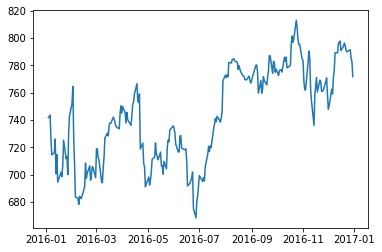

In [58]:
plt.plot(price['GOOG']['2016-01-01':'2016-12-31'] )
#叫用plt.plot() 函數, 以 price['GOOG']['2015-01-01':'2015-12-31'] 
#為引數 繪圖